# Face Detection using Haar Cascade Classifiers

The Haar Cascade algorithm is a machine learning approach to detect objects in images, particularly faces. It uses a set of pre-trained classifiers that are able to identify facial features based on the intensity gradient variations in adjacent rectangular regions. These classifiers are applied across the image at multiple scales and locations to detect faces efficiently. The algorithm combines these weak classifiers in a "cascade" to create a strong classifier that can robustly detect faces while rejecting non-face regions. This method is relatively fast and has been widely used in face detection applications, despite the availability of more advanced deep learning techniques in recent years.

- OpenCV provides a pre-trained face detection algorithm called Haar cascades, which can be used to detect faces in real-time.

- The `cv2.CascadeClassifier` loads the pre-trained face cascade XML file (`haarcascade_frontalface_default.xml`), which contains the information necessary to detect faces.

- Steps Involved : 

    - An image is loaded using `cv2.imread()`.
    - The image is converted to grayscale using `cv2.cvtColor()`.
    - `face_cascade.detectMultiScale()` is called to perform face detection on the grayscale image. It returns a list of rectangles that represent the detected faces.
    - A rectangle is drawn around each detected face using `cv2.rectangle()`.
    - The image with the detected faces is displayed using `cv2.imshow()`.

In [1]:
# Import required Libraries
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Helper function to display images
def display_images(images, titles=None, cols=2, figsize=(10, 6), cv2_image=True):
    num_images = len(images)            
    rows = (num_images - 1) // cols + 1 

    # Create a grid of subplots
    fig, axes = plt.subplots(rows, cols, figsize=figsize)  

    for i, (image, ax) in enumerate(zip(images, axes.flatten())):
        
        # If the input images are in OpenCV format (BGR), convert them to RGB
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB) if cv2_image else image
        
        ax.imshow(image)   
        ax.axis('off')     

        # Set the title if provided
        if titles is not None:
            ax.set_title(titles[i])

    # Remove any empty subplots
    if num_images < rows * cols:
        for j in range(num_images, rows * cols):
            fig.delaxes(axes.flatten()[j])

    plt.tight_layout()  
    plt.show()   

Input to `cv.CascadeClassifier()` :

- **input image**

- **scaleFactor**: This parameter controls the scale factor by which the image is resized at each image scale. It specifies how much the image size is reduced at each scale. A smaller scale factor results in a slower but more accurate detection. Typically, a value of `1.1` is used, which means reducing the image size by `10%` at each scale.

- **minNeighbors**: This parameter specifies the minimum number of neighbors (rectangles) required for a detected region to be considered a face. Higher values result in stricter detection by suppressing false-positive regions. It helps to eliminate small, isolated detections. The recommended range is between `3` and `6`.

In [3]:
# Read the original image
grp_img = cv.imread("assets/group.jpg")

# Convert the image to grayscale
grp_img_gray = cv.cvtColor(grp_img, cv.COLOR_BGR2GRAY)

# Load the face cascade classifier
haar_cascade = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml")

# Detect faces in the grayscale image
faces_rect = haar_cascade.detectMultiScale(grp_img_gray, scaleFactor=1.1, minNeighbors=5)

# Print the number of faces detected
print("Number of faces detected:", len(faces_rect))

# Display the coordinates of the detected faces
faces_rect

Number of faces detected: 6


array([[399, 425,  52,  52],
       [ 77, 430,  52,  52],
       [511, 440,  49,  49],
       [301, 452,  51,  51],
       [173, 441,  52,  52],
       [ 77, 465,  55,  55]], dtype=int32)

`faces_rect` contains all the four coordinates of found faces in the input image. Those coordinates are namely `x`, `y`, `w` and `h`.

### Draw rectangle over faces

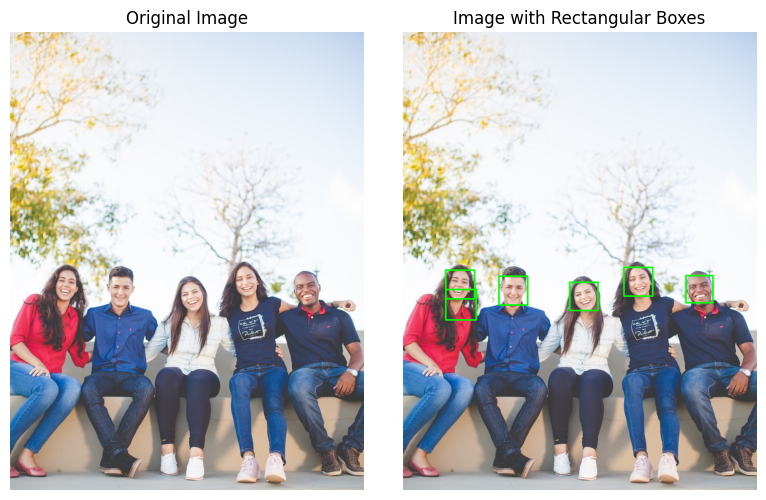

In [4]:
# Create a copy of the original image
grp_img_with_rect = grp_img.copy()

# Iterate over all the coordinates and draw rectangles around the faces
for (x, y, w, h) in faces_rect:
    cv.rectangle(grp_img_with_rect, (x, y), (x+w, y+h), (0, 255, 0), thickness=2)

# Visualize the original image and the image with rectangular boxes around faces
display_images([grp_img, grp_img_with_rect], ["Original Image", "Image with Rectangular Boxes"], figsize=(8, 5))

### Face Recognition

- Face recognition is a task in computer vision that involves identifying or verifying the identity of individuals based on their facial features. 

- OpenCV provides several approaches for face recognition, including traditional methods like Eigenfaces, Fisherfaces, and Local Binary Patterns (LBPs), as well as more advanced deep learning-based approaches.

Steps Involve:

- **Face Data Collection**:

    - Collect a dataset of face images for each individual you want to recognize. Ensure that the images are well-aligned and have consistent lighting conditions.

    - Store the face images in separate directories or with labels indicating the corresponding person's identity.

- **Face Data Preprocessing**:

    - Convert the face images to grayscale.

    - Resize the images to a fixed size to ensure consistent input dimensions.

- **Face Recognition Model Training**:

    - Use the `cv2.face.BPHFaceRecognizer_create()` function to create an Eigenface recognizer object.
    
    - Load the face images and corresponding labels into the recognizer using the `read()` method.
    
    - Train the recognizer using the `train()` method, which learns the underlying face representation from the provided dataset.

- **Face Recognition**:
    
    - Capture or load a new face image to be recognized.
    
    - Preprocess the image (convert to grayscale, resize, etc.) using the same steps as during training.
    
    - Pass the preprocessed image to the recognizer's `predict()` method to obtain the predicted label and confidence score.
    
    - Compare the predicted label and confidence score with the known labels and thresholds to determine the recognized person's identity.


In `assets/Faces`, I have `train` and `val` subfolders which contain face images of different hollywood actors.

I will be using OpenCV to construct a face recognition model which can be trained using `assets/Faces/train` data and can be deployed to predict the name of the people by analyzing their facial texture.

**Model Training**

In [5]:
# Define the base directory
BASE_DIR = "assets/Faces/train"

# Define lists for storing features and labels
features = []
labels = []

# Define the label names
classes = ["Ben Afflek", "Elton John", "Jerry Seinfield", "Madonna", "Mindy Kaling"]

# Load the Haar cascade model
haar_cascade = cv.CascadeClassifier("assets/haarcascade_frontalface_default.xml")

# Iterate over classes
for idx, cls in enumerate(classes):
    # Construct path for each class
    img_files_path = os.path.join(BASE_DIR, cls)
    
    # Iterate over each image for a class
    for img_path in os.listdir(img_files_path):
        img_path = os.path.join(img_files_path, img_path)
        face_img = cv.imread(img_path)
        
        # Convert the image to grayscale
        face_img_gray = cv.cvtColor(face_img, cv.COLOR_BGR2GRAY)
        
        # Face detection
        face_rect = haar_cascade.detectMultiScale(face_img_gray, scaleFactor=1.1, minNeighbors=3)
        
        # Iterate over coordinates
        for x, y, w, h in face_rect:
            # Extract the face region
            extracted_face = face_img_gray[y:y+h, x:x+h]
            # Append the face region to the features list
            features.append(extracted_face)
            # Populate labels
            labels.append(idx)

# Convert lists to numpy arrays
features = np.array(features, dtype='object')
labels = np.array(labels)

print('Training done ---------------')

# Create LBPH face recognizer
face_recognizer = cv.face.LBPHFaceRecognizer_create()

# Train the recognizer on the features and labels
face_recognizer.train(features, labels)

# Save the trained model, features, and labels
face_recognizer.save('face_trained.yml')
np.save('features.npy', features)
np.save('labels.npy', labels)

Training done ---------------


**Model's Inference**

Since traning is done we can use trained model to do inference over unseen images. In `Faces` folder we have `val` subfolder which contains new images. Let's see how the trained model is performing over validation dataset.

ben_afflek


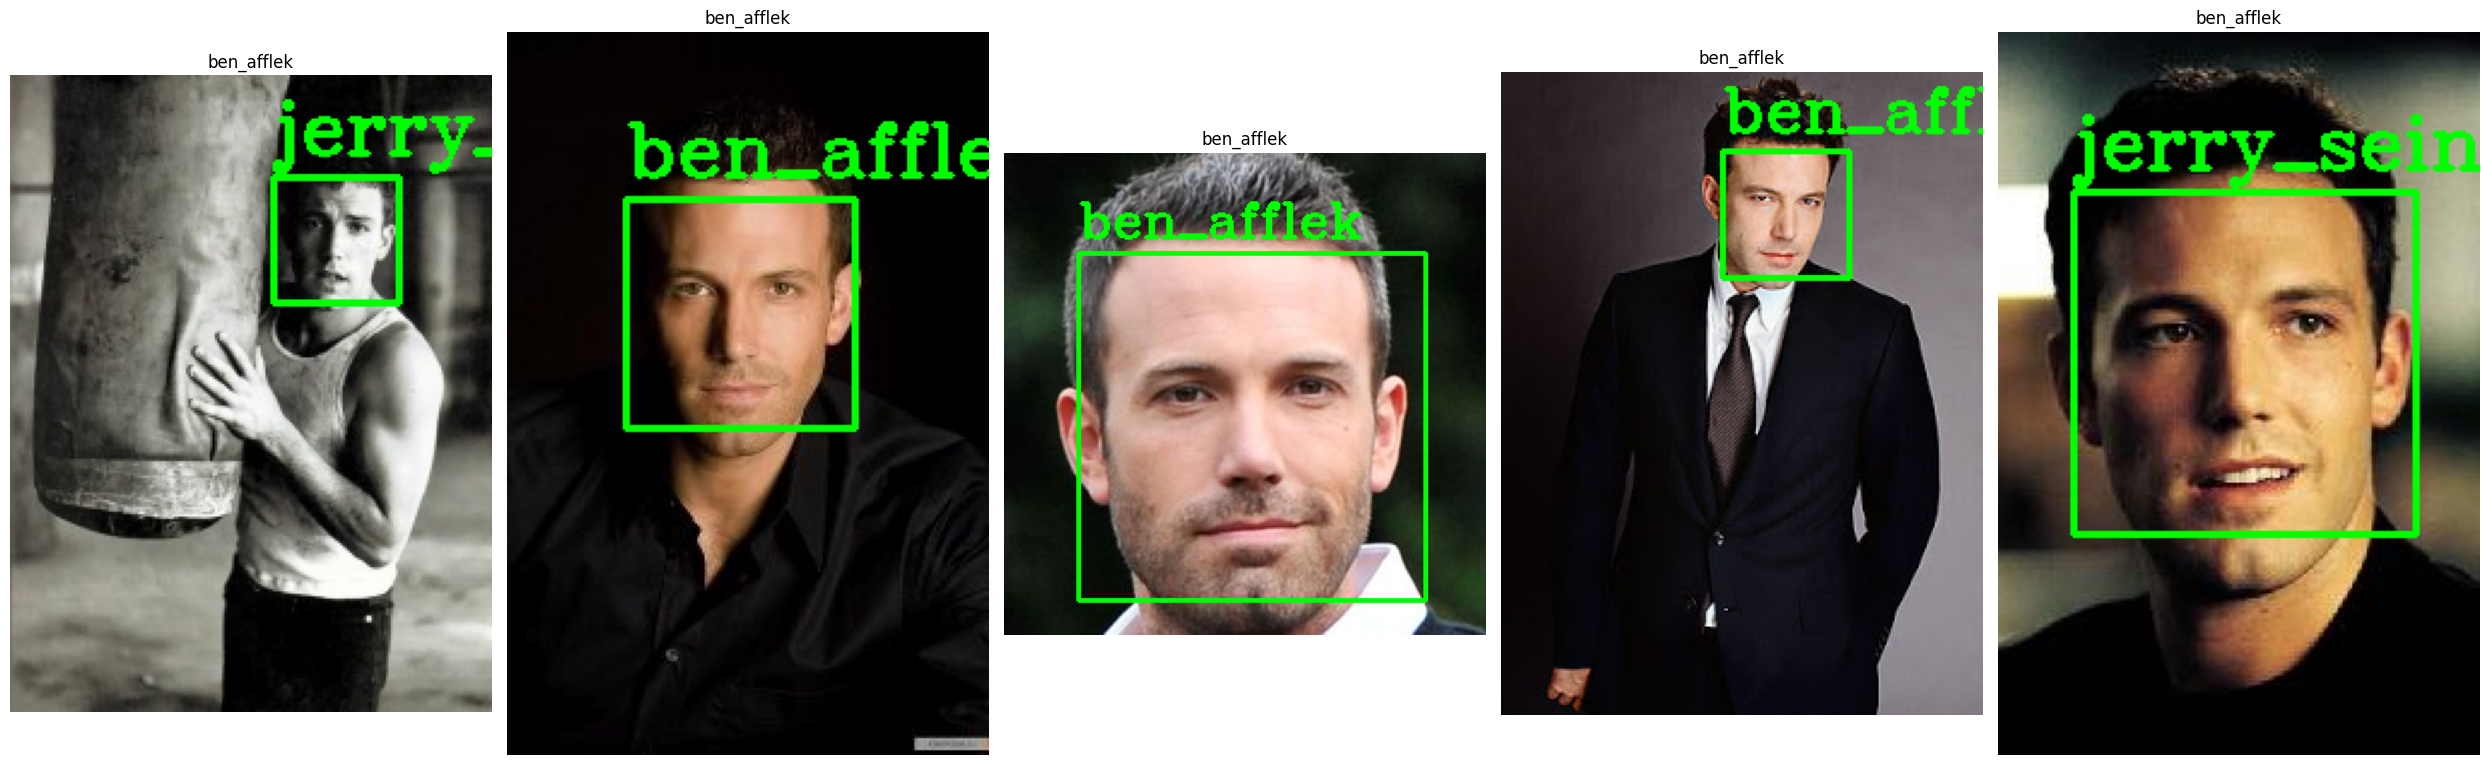

elton_john


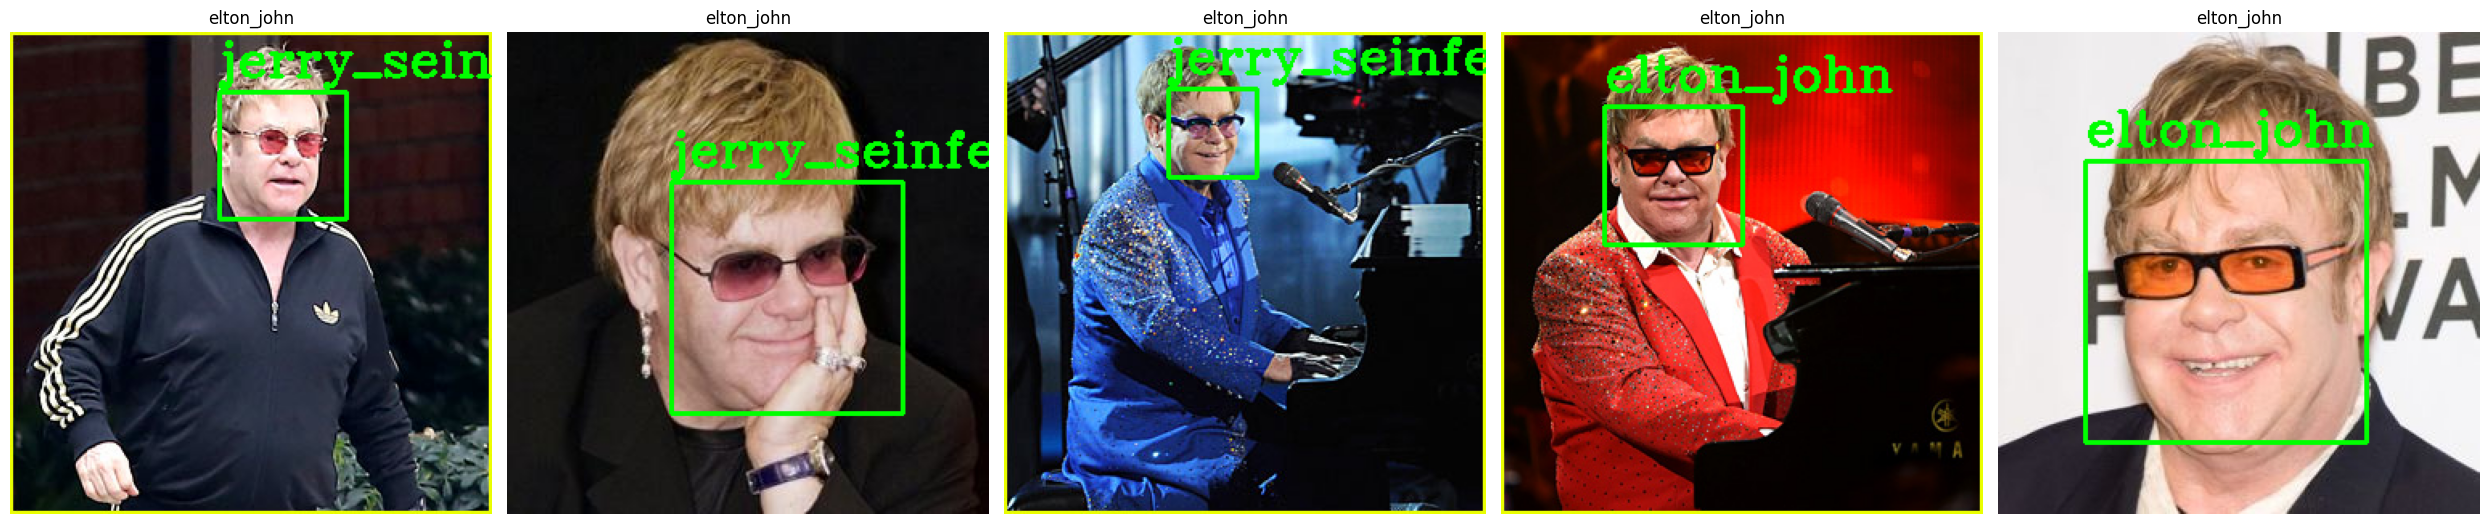

jerry_seinfeld


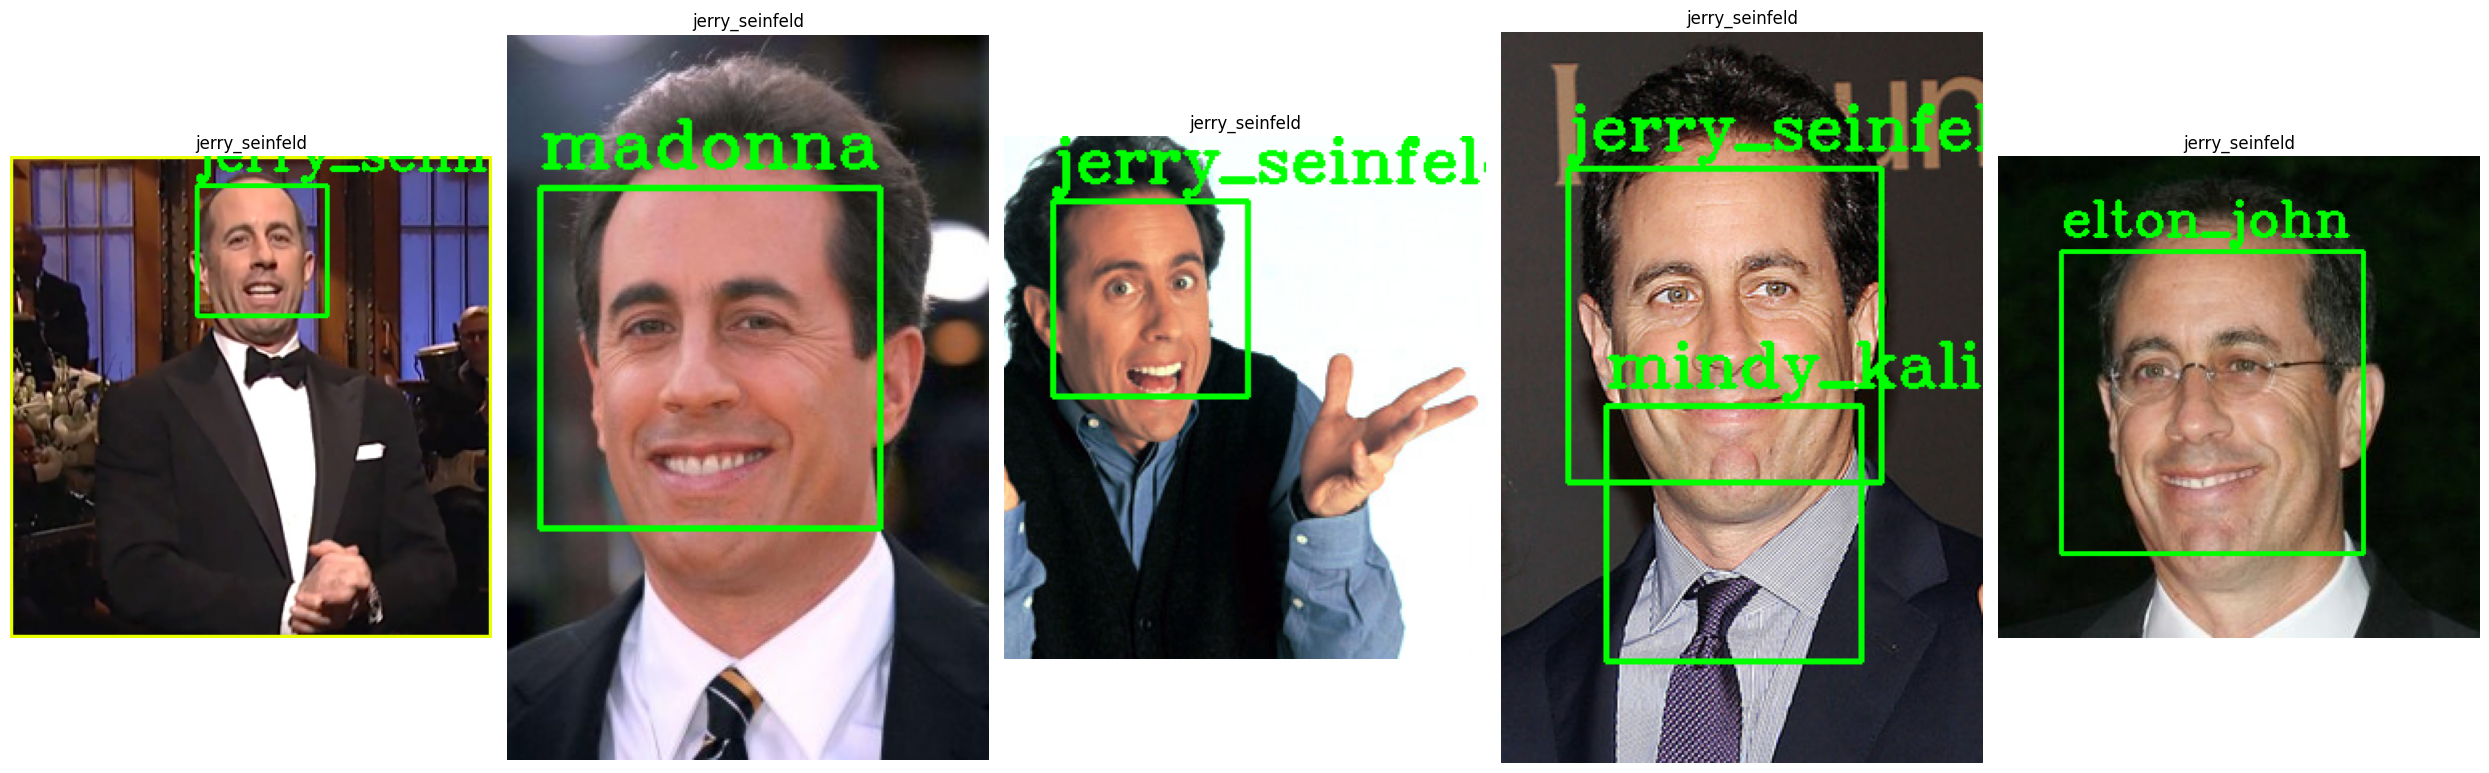

madonna


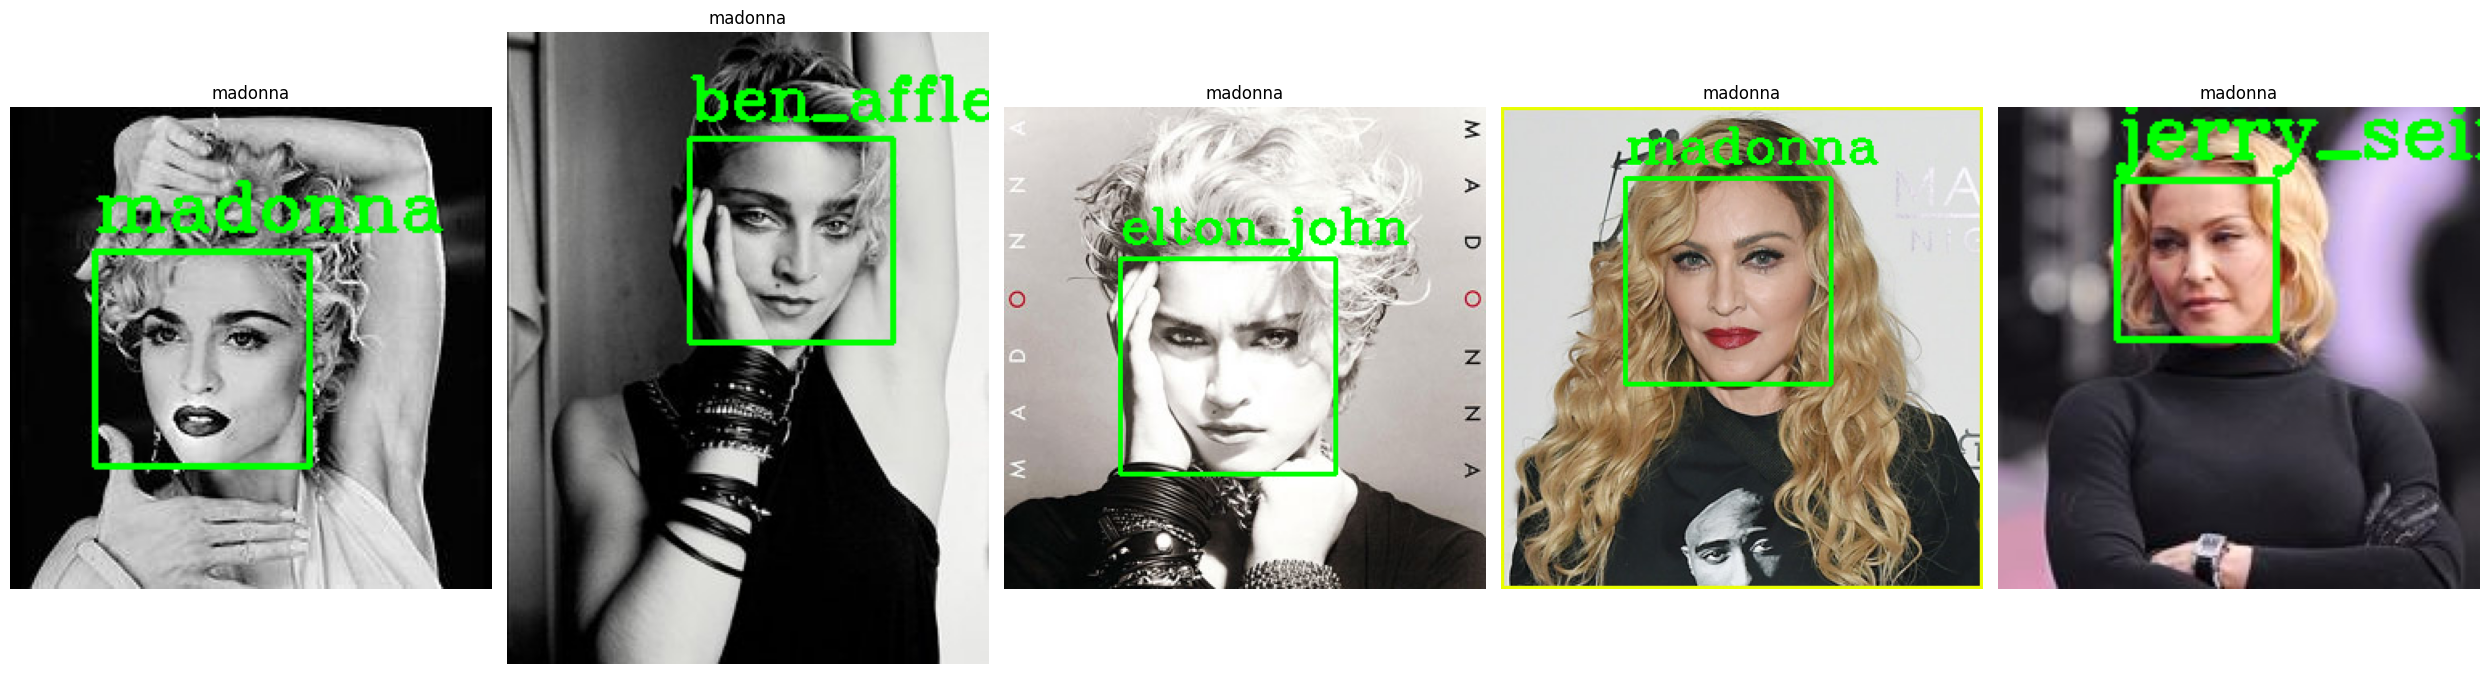

mindy_kaling


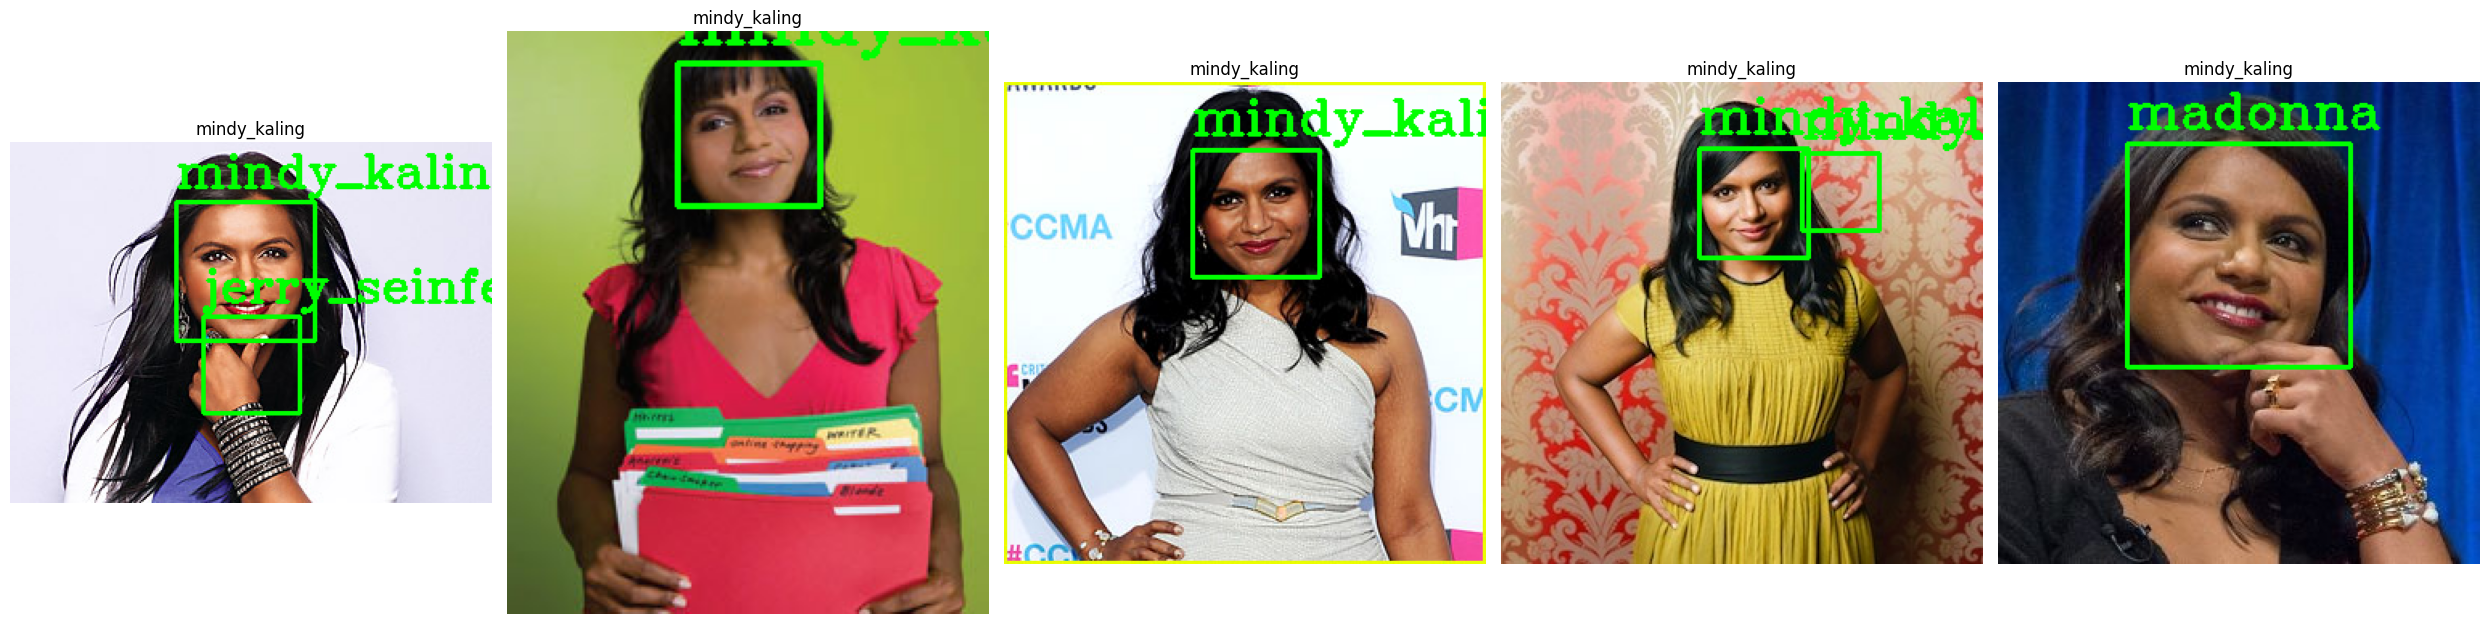

In [6]:
# Define the label names
classes = ["ben_afflek", "elton_john", "jerry_seinfeld", "madonna", "mindy_kaling"]

# Load the Haar cascade model
haar_cascade = cv.CascadeClassifier("assets/haarcascade_frontalface_default.xml")

# Load the saved model and its weights
face_recognizer_trained = cv.face.LBPHFaceRecognizer_create()
face_recognizer_trained.read("face_trained.yml")

# Define the base directory for validation dataset
BASE_DIR = "assets/Faces/val"

# Iterate over classes
for cls in classes:
    print(cls)

    class_path = os.path.join(BASE_DIR, cls)
    class_imgs = []  # List to store images with detected faces for each class

    # Iterate over images in each class
    for img_path in os.listdir(class_path):
        img_path = os.path.join(class_path, img_path)
        img_arr = cv.imread(img_path)

        # Convert the image to grayscale
        img_gray = cv.cvtColor(img_arr, cv.COLOR_BGR2GRAY)

        # Detect faces
        face_rect = haar_cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=3)

        # Iterate over all the coordinates
        for x, y, w, h in face_rect:

            # Extract face ROI
            face_roi = img_gray[y:y+h, x:x+w]

            # Predict the label and confidence
            label, confidence = face_recognizer_trained.predict(face_roi)

            # Put the class name and draw a rectangular box around the face
            cv.putText(img_arr, classes[label], (x, y - 10), cv.FONT_HERSHEY_COMPLEX, 1.0, (0, 255, 0), thickness=2)
            cv.rectangle(img_arr, (x, y), (x+w, y+h), (0, 255, 0), thickness=2)

        # Append the modified image to the class_imgs list
        class_imgs.append(img_arr)

    # Display images for the current class
    display_images(class_imgs, [cls] * len(class_imgs), figsize=(25, 10), cols=5)

Based on the above outputs, it appears our face detection model is performing quite well at detecting and localizing faces in the photos.